In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\RAVDESS\\actor_data.csv")
df.head()

,Actor_ID,Folder_Name,File_Name
0,1,Actor_01,03-01-01-01-01-01-01.wav
1,1,Actor_01,03-01-01-01-01-02-01.wav
2,1,Actor_01,03-01-01-01-02-01-01.wav
3,1,Actor_01,03-01-01-01-02-02-01.wav
4,1,Actor_01,03-01-02-01-01-01-01.wav


In [5]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\RAVDESS\\' + str(df["Folder_Name"][i]) + '\\' + df["File_Name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["Actor_ID"][i])

    return features, labels

In [6]:
x, y = parser()

In [7]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(1440, 128)
(1440,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1080, 128), (1080,), (360, 128), (360,))

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [12]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([20, 24, 13,  1,  6,  2, 22, 13, 12,  7, 14, 22, 19, 17,  6,  6,  9,
       12, 21,  6, 15, 13, 22,  6, 15, 22, 15,  9, 17, 22, 13, 10,  2, 13,
       23,  9,  8, 23, 20, 10, 22, 24, 15, 17, 23, 22,  6,  5, 14, 23, 14,
        9, 16, 17, 11,  4, 16,  6,  6, 20,  4, 15, 23, 17, 20,  8, 14, 21,
        9,  5,  1, 16,  8, 16, 21, 14, 22, 22, 17, 15,  3,  1, 19, 15, 13,
        4, 20,  3, 21, 16, 24, 11,  8,  1, 17, 22, 22, 24, 15, 22, 14,  9,
        7, 21, 21, 18, 21, 11, 13, 13, 22, 23, 15,  8, 22,  6, 12,  9, 24,
        6, 13,  5, 15,  8,  6, 23,  8, 10, 22,  9,  8, 22, 22,  9, 13,  9,
       22, 21,  9,  6, 13, 22,  9, 15,  7, 13, 13, 21, 23,  7,  2, 24, 20,
       15,  4, 22, 20, 21, 17,  8, 21, 17,  6,  6,  9,  5,  5, 20,  5, 24,
       10,  3, 20,  2, 20,  3, 18, 16,  2, 21, 22, 11, 11, 22, 17,  2,  6,
       20, 20, 17,  9, 10, 24, 17, 14,  7,  8, 10, 17, 18,  9,  6,  8,  5,
       22, 23,  5,  6, 16,  6, 13, 15, 23, 10,  9, 20, 12, 22,  8, 17, 23,
        8, 13, 13,  8,  6

In [15]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training-set accuracy score: 0.4500


In [16]:
confusion_matrix(y_test, y_pred_test)

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  4,  0,
         1,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  2,  0,  2,
         0,  0,  0,  0,  0,  4,  0,  1],
       [ 0,  0,  5,  0,  2,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,
         0,  0,  1,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  8,  0,  1,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  2,  1,  0,  2,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  4,  1,  1,  1,  2,  0,  0,  0,  2,  0,  1,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0, 10,  0,  0,  0,  2,  0,  2,  0,
         0,  0,  0,  0, 

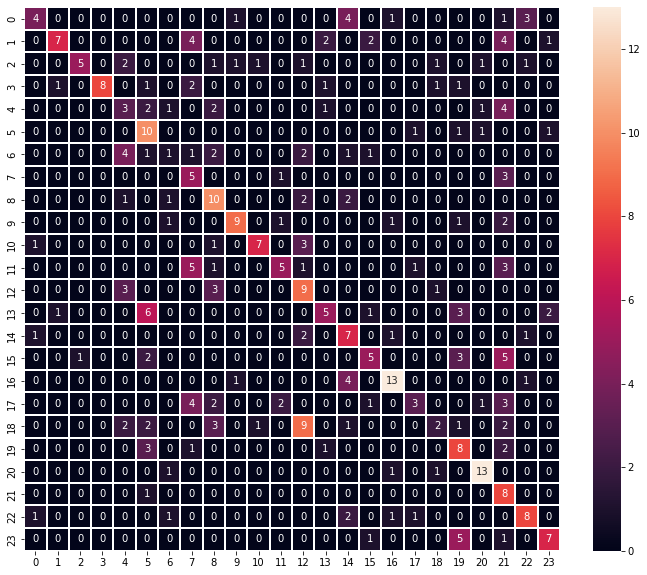

In [17]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot = True, linewidths = 2, fmt="d", 
           )
plt.show()